In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
%matplotlib inline

In [3]:
dat = pd.date_range(start="2020-01-30",end="2020-05-20")

In [4]:
dat

DatetimeIndex(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08',
               ...
               '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14',
               '2020-05-15', '2020-05-16', '2020-05-17', '2020-05-18',
               '2020-05-19', '2020-05-20'],
              dtype='datetime64[ns]', length=112, freq='D')

In [5]:
cols_to_use = ['Date', 'Total Deceased'] # or [0,1,2,3]
dataC = pd.read_csv('case_time_series.csv', usecols= cols_to_use)

In [6]:
dataC.head()

,Date,Total Deceased
0,30 January,0
1,31 January,0
2,01 February,0
3,02 February,0
4,03 February,0


In [7]:
dataC["Dates"] = dat

In [8]:
dataC["Total"] = dataC["Total Deceased"]

In [9]:
dataC = dataC.drop(["Date","Total Deceased"],axis = 1)

In [10]:
dataC.index.freq = 'MS'
dataC.head()

,Dates,Total
0,2020-01-30,0
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,0
4,2020-02-03,0


In [11]:
dataC.tail(4)

,Dates,Total
108,2020-05-17,3024
109,2020-05-18,3155
110,2020-05-19,3301
111,2020-05-20,3433


In [12]:
dataC.to_csv('deceased.csv', index=False) 

In [13]:
df = pd.read_csv('deceased.csv',index_col='Dates',parse_dates=True)

In [14]:
df.index.freq = 'D'
df.head()

,Total
Dates,
2020-01-30,0
2020-01-31,0
2020-02-01,0
2020-02-02,0
2020-02-03,0


In [15]:
df = df.loc[~(df==0).all(axis=1)]

In [16]:
df

,Total
Dates,
2020-03-12,1
2020-03-13,1
2020-03-14,2
2020-03-15,2
2020-03-16,2
2020-03-17,3
2020-03-18,3
2020-03-19,4
2020-03-20,4


In [17]:
train_data = df.iloc[:71] 
test_data = df.iloc[45:]

In [18]:
train_data.shape

(70, 1)

In [19]:
test_data.shape

(25, 1)

In [20]:
train_data.head(5)

,Total
Dates,
2020-03-12,1
2020-03-13,1
2020-03-14,2
2020-03-15,2
2020-03-16,2


In [21]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [22]:
fitted_model = ExponentialSmoothing(train_data['Total'],trend='mul',seasonal_periods=12).fit()

C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [23]:
test_predictions = fitted_model.forecast(25).rename('Deceased Cases Prediction')

In [24]:
test_predictions

2020-05-21    3583.584065
2020-05-22    3737.524232
2020-05-23    3898.077213
2020-05-24    4065.527075
2020-05-25    4240.170087
2020-05-26    4422.315247
2020-05-27    4612.284824
2020-05-28    4810.414932
2020-05-29    5017.056122
2020-05-30    5232.574007
2020-05-31    5457.349902
2020-06-01    5691.781505
2020-06-02    5936.283596
2020-06-03    6191.288773
2020-06-04    6457.248218
2020-06-05    6734.632493
2020-06-06    7023.932376
2020-06-07    7325.659726
2020-06-08    7640.348390
2020-06-09    7968.555148
2020-06-10    8310.860697
2020-06-11    8667.870680
2020-06-12    9040.216755
2020-06-13    9428.557715
2020-06-14    9833.580654
Freq: D, Name: Deceased Cases Prediction, dtype: float64

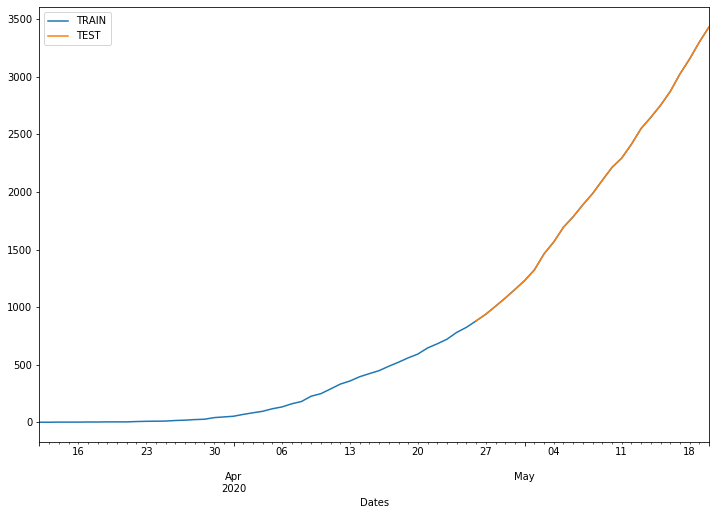

In [25]:
train_data['Total'].plot(legend=True,label='TRAIN')
test_data['Total'].plot(legend=True,label='TEST',figsize=(12,8))

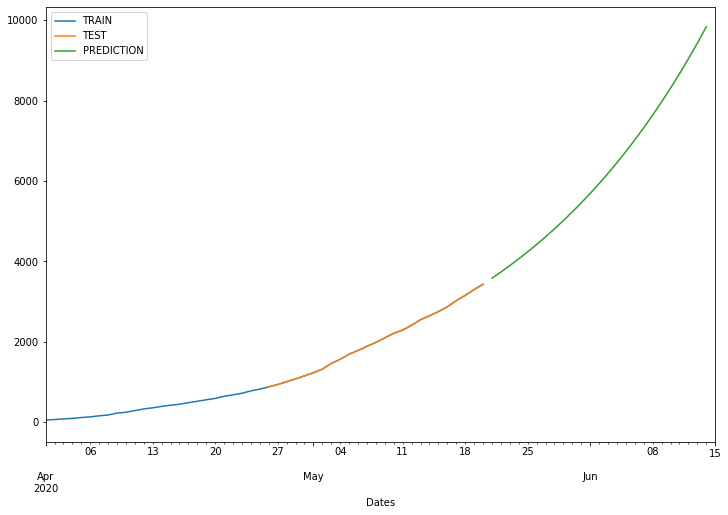

In [26]:
train_data['Total'].plot(legend=True,label='TRAIN')
test_data['Total'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2020-04-01','2020-06-15']) #Specify Date to see prediction

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [28]:
mean_absolute_error(test_data,test_predictions)

4182.867777329104

In [29]:
mean_squared_error(test_data,test_predictions)

18694290.53780263

In [30]:
np.sqrt(mean_squared_error(test_data,test_predictions))

4323.689458992473

In [31]:
test_data.describe()

,Total
count,25.000000
mean,2030.240000
std,792.499226
min,881.000000
25%,1323.000000
50%,1986.000000
75%,2648.000000
max,3433.000000


In [32]:
final_model = ExponentialSmoothing(df['Total'],trend='mul',seasonal_periods=12).fit()

C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [33]:
forecast_predictions = final_model.forecast(25)

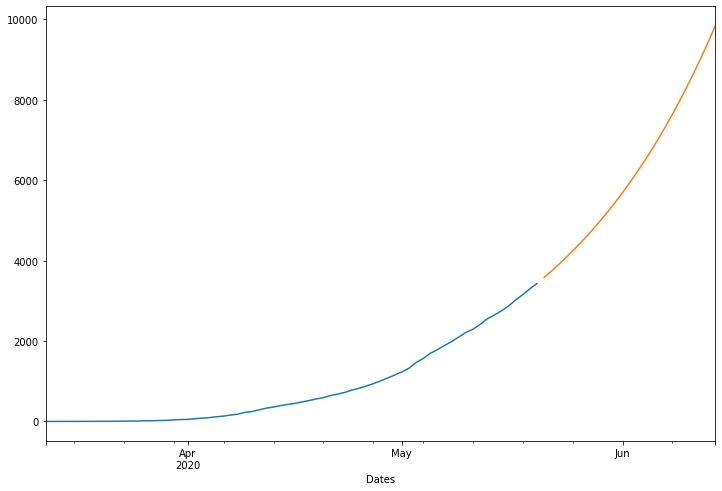

In [34]:
df['Total'].plot(figsize=(12,8))
forecast_predictions.plot()